In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['font.family'] = "HCR Dotum" # 한글 인코딩 옵션
# 그래프의 global 옵션 지정 

In [5]:
df = pd.read_excel("고속터미널-25-10.xlsx")
df['date'] = df['date'].astype(str)
df['day'] = df['date'].str[6:8]
df['day'] = df['day'].astype(int)
df.head()

,date,line,stn,geton,getoff,day
0,20251001,3호선,고속터미널,46131,45906,1
1,20251001,7호선,고속터미널,17910,16294,1
2,20251001,9호선,고속터미널,15793,20362,1
3,20251002,3호선,고속터미널,53507,66014,2
4,20251002,7호선,고속터미널,19734,18442,2


In [7]:
grp = df.groupby("line")
ex3 = grp.get_group("3호선")
ex7 = grp.get_group("7호선")
ex9 = grp.get_group("9호선")

ex7.tail()

,date,line,stn,geton,getoff,day
79,20251027,7호선,고속터미널,18190,16165,27
82,20251028,7호선,고속터미널,18008,16494,28
85,20251029,7호선,고속터미널,18364,16403,29
88,20251030,7호선,고속터미널,18499,16164,30
91,20251031,7호선,고속터미널,22087,17232,31


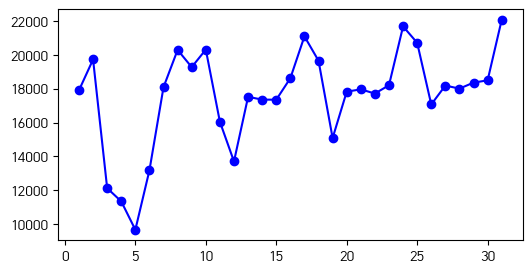

In [16]:
# 7호선 승차인원 그래프
fig, ax = plt.subplots(figsize=(6,3))
# ax 라는 객체를 만들고 해당 객체에 값을 계속 삽입하며 그래프 생성
ax.plot(ex7.day, ex7.geton, "bo-")
plt.show()

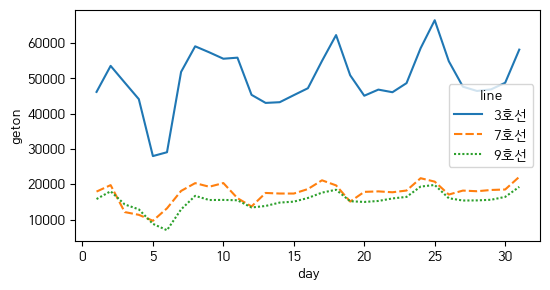

In [17]:
import seaborn as sns

plt.figure(figsize=(6,3))
# sns.lineplot(data=df, x='day', y='geton', hue='line')
sns.lineplot(data=df, x='day', y='geton', hue='line', style='line')
# matplot lib는 3개의 선을 구하기 위해 각각 하나의 객체를 생성했었으나 seaborn을 사용하면 그럴 필요 x
# df 내에는 3,5,7을 구분하는 line 변수가 있음 
# hue는 그룹 변수 할당, line: 선 분리 
plt.show()

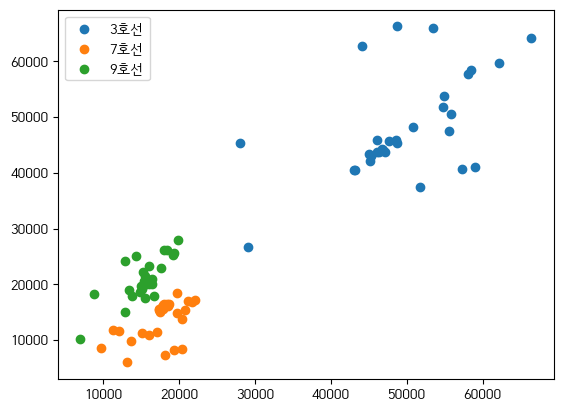

In [19]:
fig, ax = plt.subplots()

# x,y의 순서쌍 즉 산점도 의미 
ax.scatter(ex3.geton, ex3.getoff, marker='o')
ax.scatter(ex7.geton, ex7.getoff)
ax.scatter(ex9.geton, ex9.getoff)

ax.legend(['3호선', '7호선', '9호선'])
plt.show()